In [2]:
import pandas as pd
df = pd.read_csv('pokemon.csv', encoding = 'unicode_escape')
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
#drop categorical variables as we will not be able to plot them
types = df['Type 1'].isin(['Grass', 'Fire', 'Water'])
drop_cols = ['Type 1', 'Type 2', 'Generation', 'Legendary', '#']
df = df[types].drop(columns=drop_cols)

In [5]:
df.head()

,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,45,49,49,65,65,45
1,Ivysaur,60,62,63,80,80,60
2,Venusaur,80,82,83,100,100,80
3,Mega Venusaur,80,100,123,122,120,80
4,Charmander,39,52,43,60,50,65


In [12]:
#creating k-means cluster and fit using only 2 datapoints
#We will fit 'Attack' and 'Defense' stats
from sklearn.cluster import KMeans
import numpy as np

kmeans= KMeans(n_clusters=3, random_state=3)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])

#create centroid so we know the centroid points for each cluster
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

#now scatter the clusters without any centroids
df['cen_x'] = df.cluster.map({0: cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0: cen_y[0], 1:cen_y[1], 2:cen_y[2]})

#define colors for plot
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0: colors[0], 1:colors[1], 2:colors[2]})

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


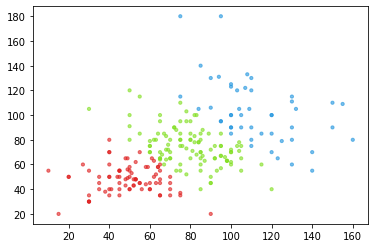

In [13]:
#create scatter plot for attack and defense
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.Attack, df.Defense, c=df.c, alpha=0.6, s=10)

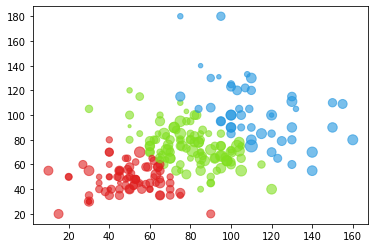

In [14]:
#scatter plot highlighting datapoints from each cluster
plt.scatter(df.Attack, df.Defense, c=df.c, s=df.Speed, alpha=0.6)

Text(0, 0.5, 'Defense')

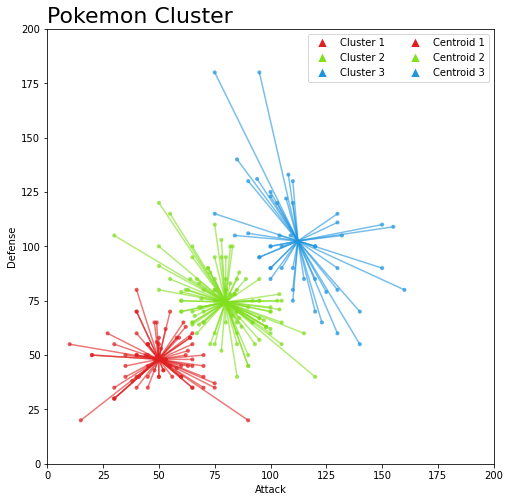

In [21]:
#create centroid point for each of the clusters
from matplotlib.lines import Line2D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(df.Attack, df.Defense, c=df.c, alpha=0.6, s=10)

plt.scatter(cen_x, cen_y, marker='^', c=colors, s=10)

#for loop creates x and y values for centroids
for idx, val in df.iterrows():
    x=[val.Attack, val.cen_x]
    y=[val.Defense, val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.6)

##centroids
cent_leg = [Line2D([0], [0], marker='^', color='w', label = 'Centroid {}'.format(i+1),
                   markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
#legend
legend_elements = [Line2D([0], [0], marker='^', color='w', label = 'Cluster {}'.format(i+1),
                   markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='^', color='w', label = 'Centroid {}'.format(i+1),
                               markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])


plt.legend(handles = legend_elements, loc = 'upper right', ncol=2)
plt.xlim(0,200)
plt.ylim(0,200)
plt.title('Pokemon Cluster', loc ='left', fontsize =22)
plt.xlabel('Attack')
plt.ylabel('Defense')